# Loan Dataset Exploration
## by Chun-Feng Pai

## Preliminary Wrangling

> This dataset consists of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# importa data for analysis 
loans=pd.read_csv('prosperLoanData.csv')

In [3]:
# investigate the dataset and do primary wrangling
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
# convert CreditGrade, EmploymentStatus, and IncomeRange into ordered categorical datatype.
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
                    'EmploymentStatus': ['Not available', 'Other', 'Not employed','Retired', 'Self-employed', 'Part-time', 'Full-time', 'Employed'],
                    'IncomeRange':['Not displayed','Not employed','0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [5]:
# investigate numeric variables in this dataset.
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> This dataset consists of 113937 loans and 81 variables. Most of variables in this dataset are numeric. I make three columns ordered categorical datatype: CreditGrade, EmploymentStatus, and IncomeRange.<br><br>
 (worst) ——> (best)<br>
 CreditGrade: NC, HR, E, D, C, B, A, AA <br>
 EmploymentStatus: Not available, Other, Not employed, Retired, Self-employed, Part-time, Full-time, Employed<br>
 IncomeRange: Not displayed,Not employed, 0, 1-24,999, 25,000-49,999, 50,000-74,999, 75,000-99,999, 100,000+<br>

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the factors which have impacts on the cost of borrowing and how much loan the borrower could receive in each application.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are many factors which could impact on the loan. I believe the most factors include borrowers' income, borrowers' credt score, and the employment status.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

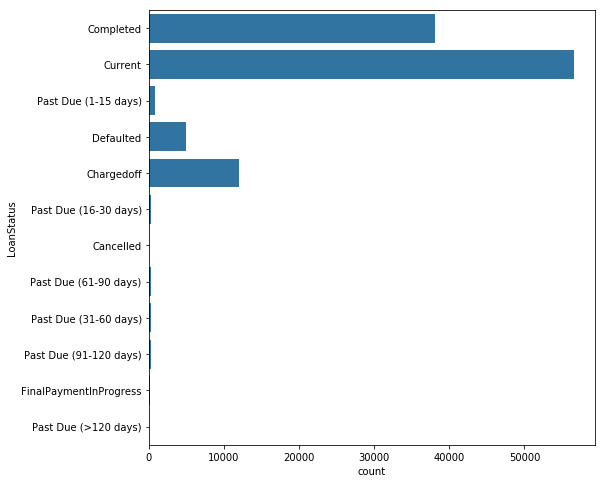

In [6]:
# first check the loan status to ensure the analysis is relevant.
plt.figure(figsize = [8,8])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='LoanStatus', color=base_color)

Most loans in this dataset are either complete or current, meaning the our analysis is still relevant. In case the load is already defaulted, our analysis could be less powerful.

(500, 28000)

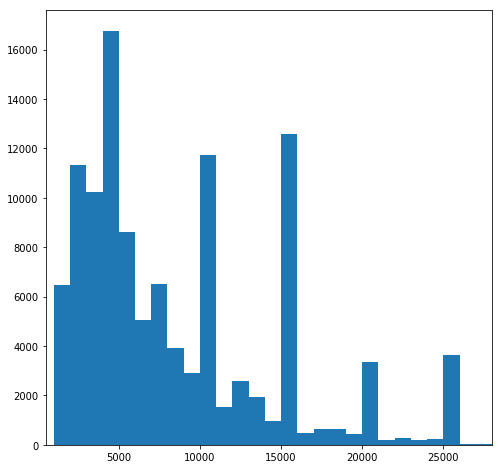

In [7]:
# check the loan amount in the dataset.
plt.figure(figsize = [8,8])
bins=np.arange(0,loans.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=loans, x='LoanOriginalAmount', color=base_color, bins=bins)
plt.xlim(500,28000)

Most loans in this dataset have amount lower than 10000 dollors, meaning this data have more small loans. 

(array([  1.30000000e+01,   1.30000000e+01,   1.00000000e+00,
          1.10000000e+01,   7.20000000e+01,   3.43000000e+02,
          1.52500000e+03,   2.54600000e+03,   3.75500000e+03,
          4.18200000e+03,   4.88800000e+03,   4.31200000e+03,
          5.19200000e+03,   4.88600000e+03,   6.21200000e+03,
          6.51500000e+03,   5.43200000e+03,   5.22800000e+03,
          5.16900000e+03,   4.70700000e+03,   5.36300000e+03,
          3.75900000e+03,   3.11900000e+03,   3.69500000e+03,
          4.02100000e+03,   3.69300000e+03,   4.04000000e+03,
          2.41100000e+03,   2.52600000e+03,   3.75700000e+03,
          1.60800000e+03,   7.34000000e+03,   4.70000000e+02,
          5.73000000e+02,   2.51000000e+03,   2.40000000e+01,
          1.70000000e+01,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

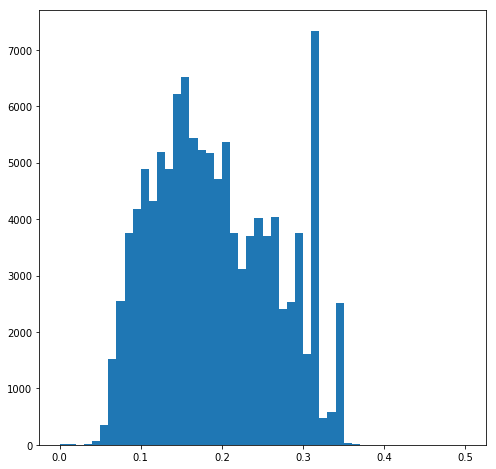

In [8]:
# check the cost of borrowing in this dataset
plt.figure(figsize = [8,8])
bins=np.arange(0,loans.BorrowerRate.max()+0.01,0.01)
plt.hist(data=loans, x='BorrowerRate', color=base_color, bins=bins)

The interest rate for most borrowers lie between 1% and 2%.

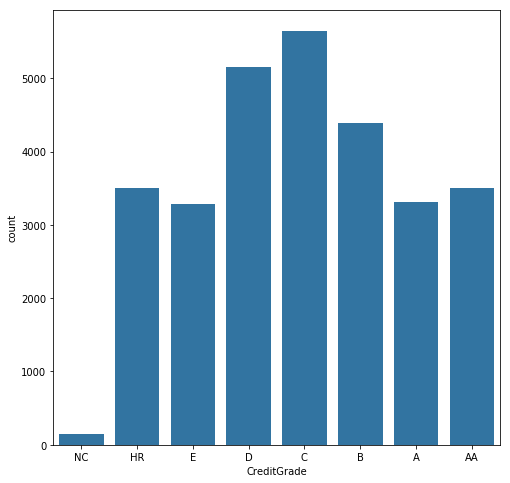

In [9]:
# check the distribution of creadit grades.
plt.figure(figsize = [8,8])
sb.countplot(data=loans, x='CreditGrade', color=base_color)

Most borrowers have medium grades of credit, falling between B and D. 

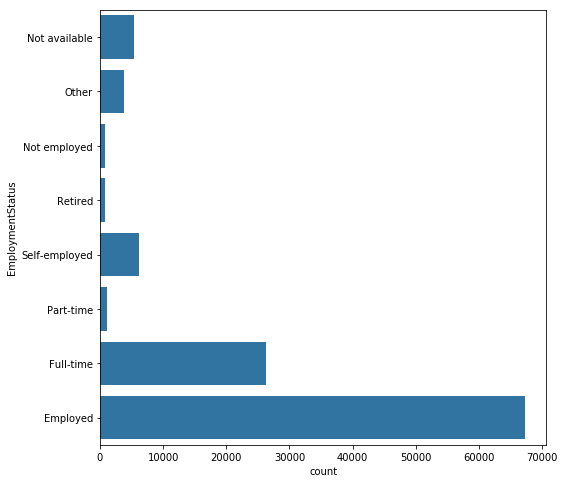

In [83]:
# check the employment status of this dataset.
plt.figure(figsize = [8,8])
sb.countplot(data=loans, y='EmploymentStatus', color=base_color)

Most of people are full-time and employed, meaning they have stable income so the banks will incur less default risk.

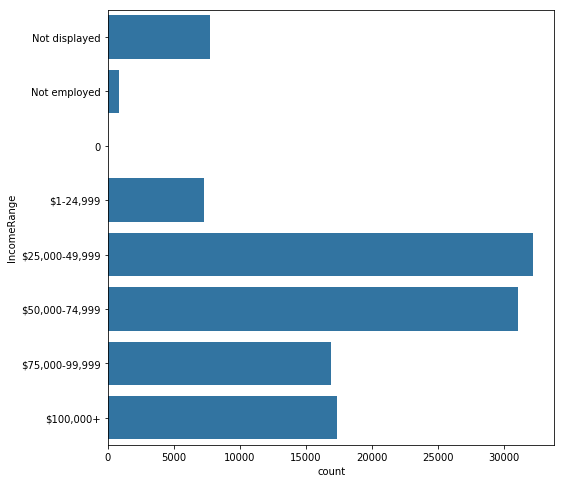

In [84]:
# check borrowers' income range
plt.figure(figsize = [8,8])
sb.countplot(data=loans, y='IncomeRange', color=base_color)

The income ranges show here that most borrowers have income between 25000 and 75000 (usd). Comparing with the distribution of the original amount we analysed before (most of loan amount is below 10000 (usd), the bank is still on the safe side.

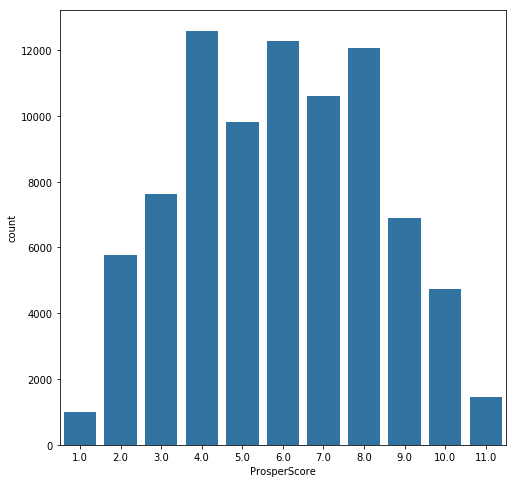

In [85]:
# check the distribution of prosper score
plt.figure(figsize = [8,8])
sb.countplot(data=loans, x='ProsperScore', color=base_color)

The bar chart echos our finding that most of people have medium rating of credit, consistent with the credit grade we analysed above. Therefore, we could also use prosper score for our analysis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Our primary findings from this dataset show the majority of loans in this dataset is small with interest rate between 1% and 2%. Additionally, most people have medium ratings of credit and are employed with medium salaries. Therefore, the data seems consisent with my expectation that the bank is only giving money to people with stable income sources.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So far I havent performed any additional data wrangling because the columns I am most interested in present good data sources. However, the following bivariate exploration may require some further data cleaning for better analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

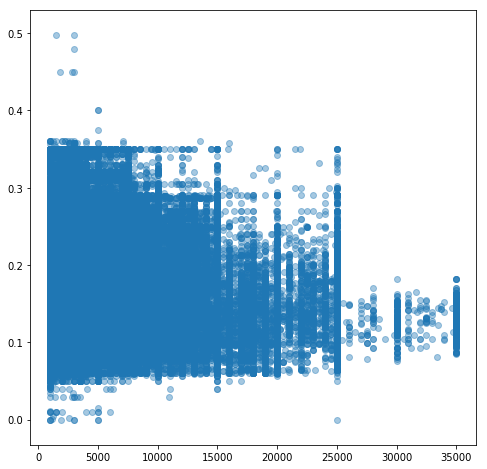

In [86]:
# make scatter plots to see the interaction between loan amount and borrower rates.
plt.figure(figsize = [8,8])
plt.scatter(data=loans, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.4)

The scatter chart demonstrates no saleint trend between these two variables. The data is clustered on the left down quadrant. Perhaps we should just sample the dataset the make more clear the trend.

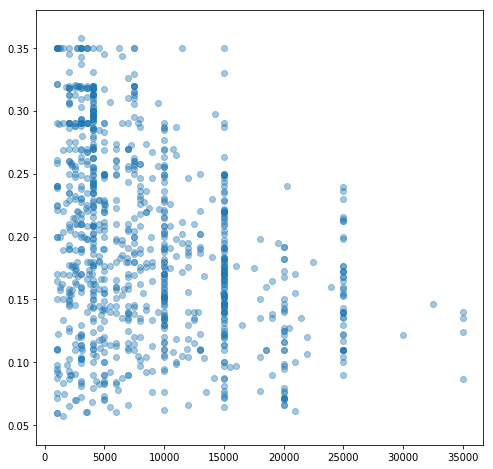

In [13]:
# use sample data to observe the relationship between loan amount and borrower rates.
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]
plt.figure(figsize = [8,8])
plt.scatter(data=loans_samp, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.4)

There seems to be a negative correlation between these two variables. This relationship contradicts my expectation because the higher amount of loans entails higher default risk and thus higher borrower costs. 

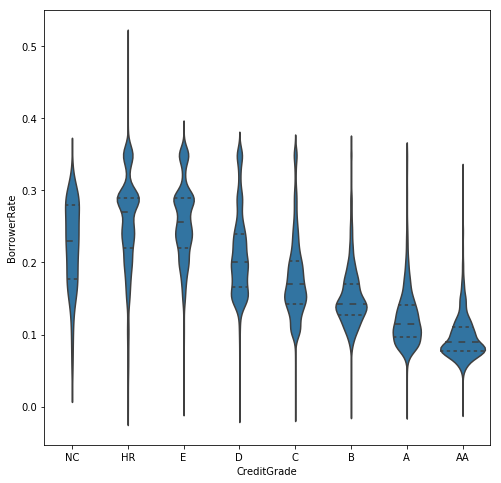

In [87]:
# use the violin chart to analyse the relationship between credit grade and borrower rates.
plt.figure(figsize = [8,8])
sb.violinplot(data=loans, x='CreditGrade',y='BorrowerRate', color=base_color, inner='quartile')

This chart shows a decreasing borrowing cost when the credit grade is higher. 

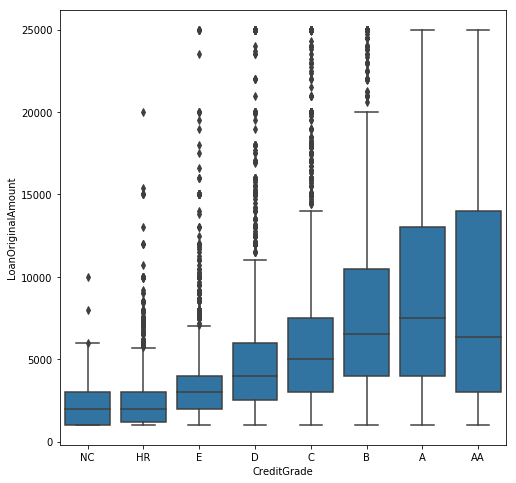

In [88]:
# use the boxplot to analyse the relationship between credit grade and loan amount.
plt.figure(figsize = [8,8])
sb.boxplot(data=loans, x='CreditGrade',y='LoanOriginalAmount', color=base_color)

The boxplot demonstrates increasing loan amount when the grade of credit is better. A second finding from this plot includes also the width of box. When you have lower credit grade, the distrubution of loan amount of loan is narrow with many outliers. However, borrowers who have good credit grades can borrow more money, leading to a wider boxplot.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

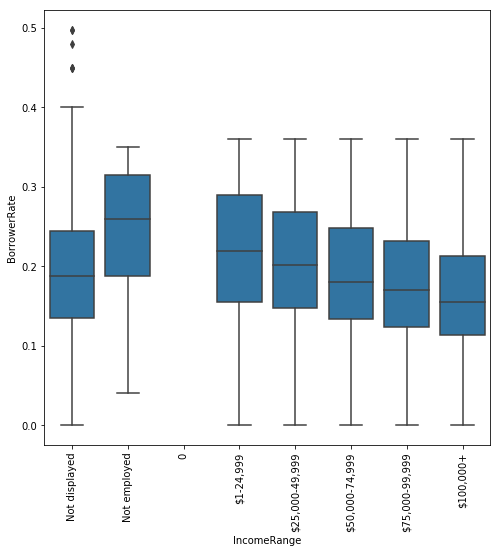

In [89]:
# check the relationship betweem borrowing cost and income.
plt.figure(figsize = [8,8])
sb.boxplot(data=loans, x='IncomeRange',y='BorrowerRate', color=base_color)
plt.xticks(Rotation=90)

This chart shows lower rates given the income is higher.

(0, 0.4)

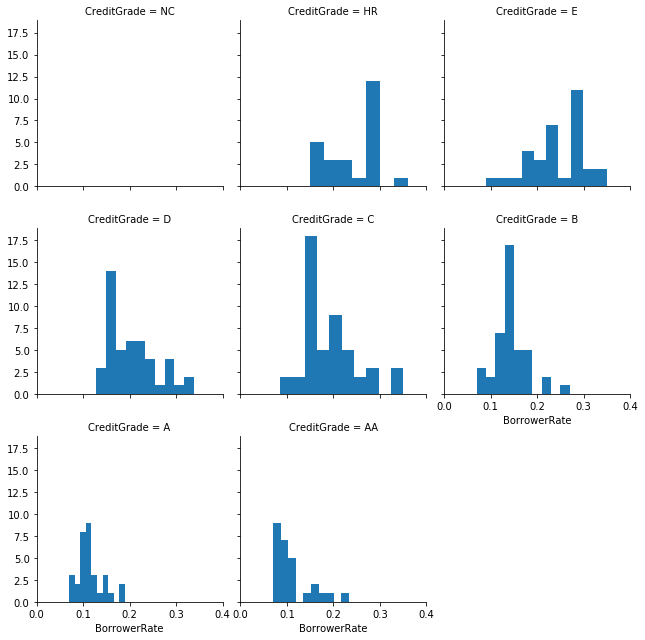

In [90]:
# check the relationship between credit grade and borrowing cost.
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, col = 'CreditGrade', col_wrap=3)
g.map(plt.hist, "BorrowerRate")
plt.xlim(0,0.4)

The visual here shows a negative relationship between borrowing cost and credit grades.

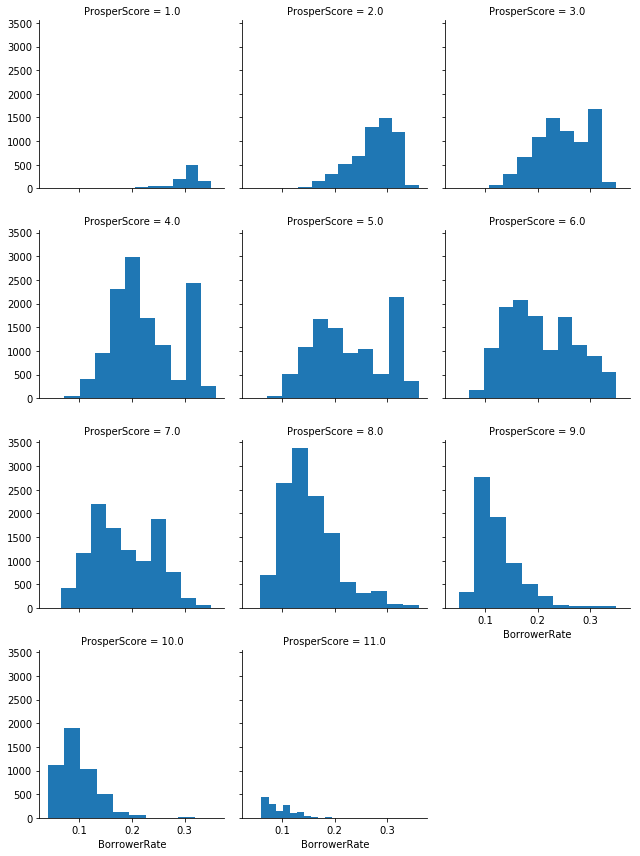

In [91]:
# check again here if the prosper score is consistent with the credit grade.
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=3)
g.map(plt.hist, "BorrowerRate")

The histogram here also demonstrates a negative relationship between interest rates and scores.

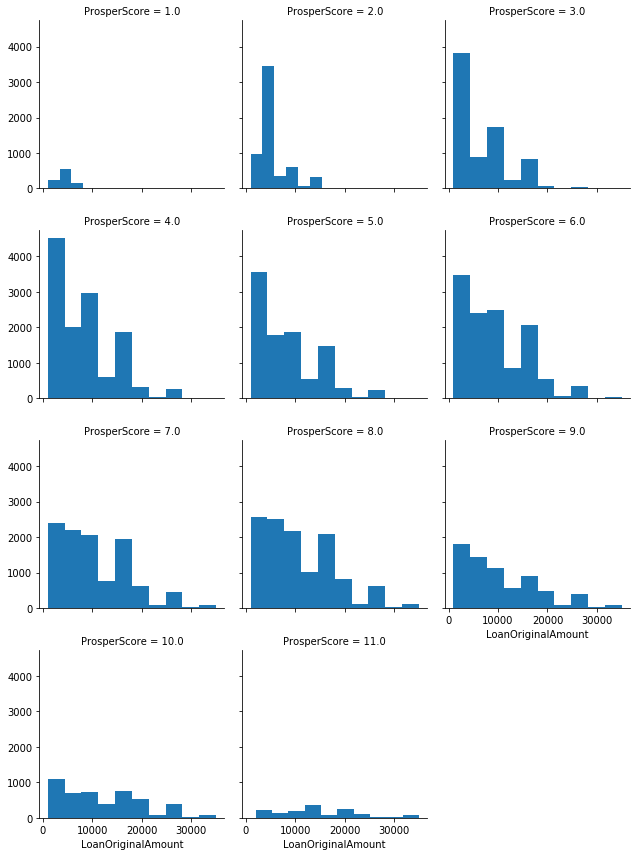

In [92]:
# check the relationship between prosper scores and loan amount.
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=3)
g.map(plt.hist, 'LoanOriginalAmount')

The lower score only has lower amount of loan, whereas the greater scores have a wider distribution of loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The finding in this section shows a negative relationship between loan amount and interest rates, a finding which first contradicts my expection. However, when I dive into other variables, I find the borrowers with higher loan amount tends to have strong rating in credit and better income. Therefore, the relationship explains why interest rates and loan amount are negatively correlated.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When I check the relationship between income range and interest rates, there is a category in the income range called not displayed. I expected this category to have higher interest rates because no information of income is deemed riskier in the banking industry. However, I see the interest rate is actually lower than other categories, a result implying people with higher income tend not to disclose their information.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

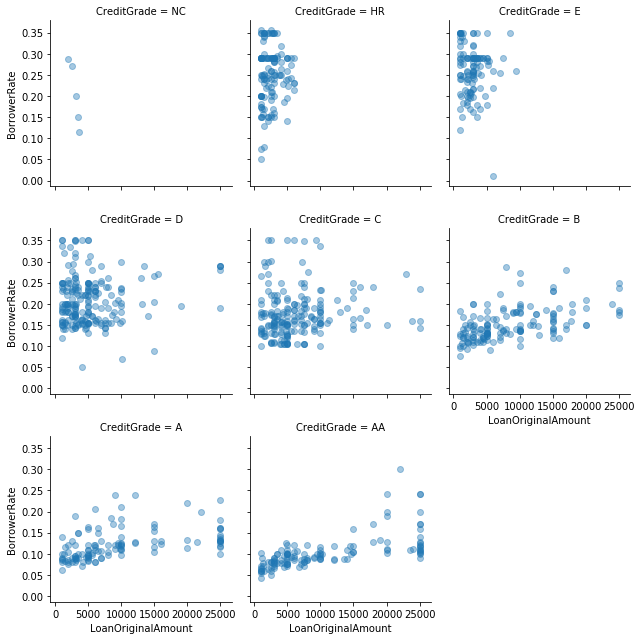

In [101]:
# investigate the relaitionship among credit grades, loan amount and interest rates.
samples = np.random.choice(loans.shape[0], 4000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, col = 'CreditGrade', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.4)

The positive relationship between loan amount and interest rates become more apparent when the credit grade is better.

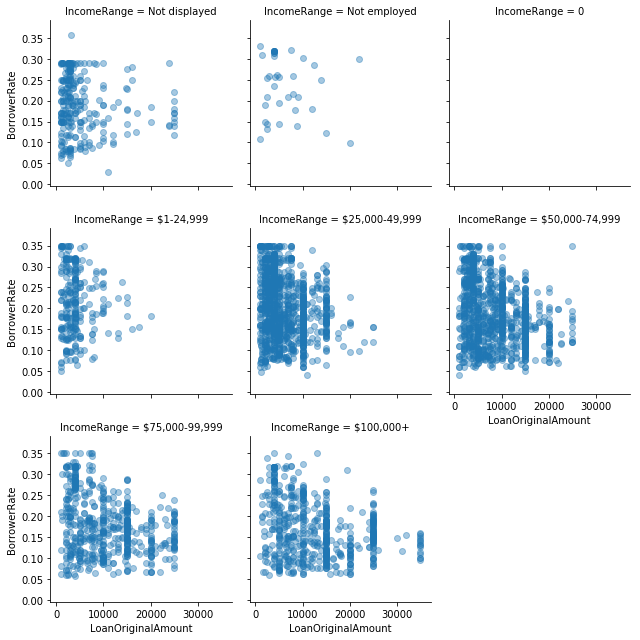

In [102]:
# investigate the relaitionship among income range, loan amount and interest rates.
samples = np.random.choice(loans.shape[0], 4000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, col = 'IncomeRange', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.4)

The charts here suggest no any strong relationship among these three variables. The interest rates are quite random regardless of the income range when the loan amount is low. As we found the negative relationship between credit grades and the interest rates, the banks may also consider other factors like occupations when giving scores to each borrowers.

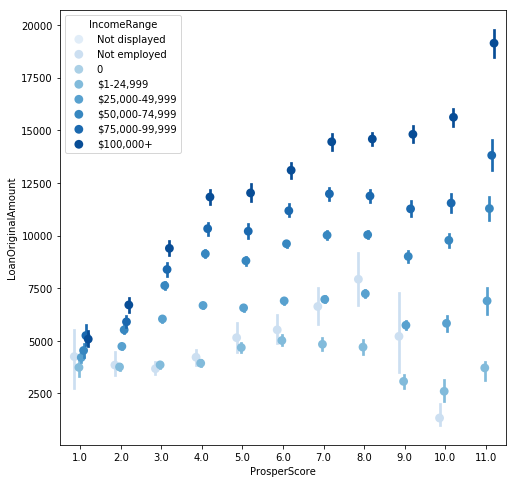

In [106]:
# check the relationship among prosper score, loan amount and income range.
plt.figure(figsize = [8,8])
sb.pointplot(data = loans, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange', palette = 'Blues', linestyles = '', dodge = 0.4)

When the income is higher, the positive correlation between loan amount and prosper socres get stronger. 

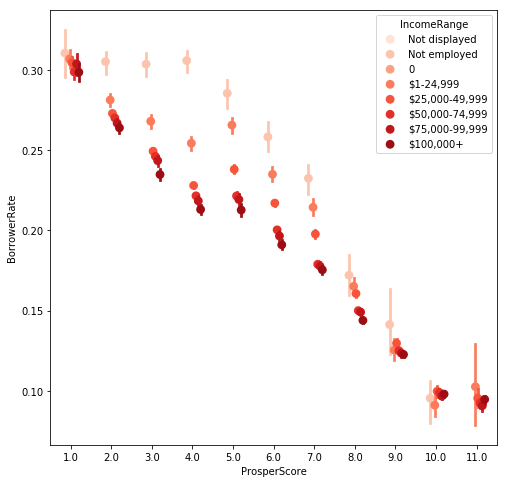

In [108]:
plt.figure(figsize = [8,8])
sb.pointplot(data = loans, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange', palette = 'Reds', linestyles = '', dodge = 0.4)

When the income is higher, the negative correlation between loan amount and prosper socres get stronger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The investigation in this part further strengthen my assumption that prosper scores, income range have impact on how much money a borrower can borrow and the interest rates they have to pay. 

### Were there any interesting or surprising interactions between features?

> Interestingly, the relationship become stroner when the income ranger is higher as we could observe from the last two charts.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!